# 9. Final Project Data Processing

Project Idea: Using pictures of eye fundus to detect ocular diseases using deep learning\
challenge: https://odir2019.grand-challenge.org/introduction/ 

Categories:
- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- Age related Macular Degeneration (A),
- Hypertension (H),
- Pathological Myopia (M),
- Other diseases/abnormalities (O)


## Loading Packages

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import random


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


## Load Training Data

In [5]:
df_load = pd.read_csv('../data/full_df.csv')
df_load

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [6]:
df = df_load[['Patient Age', 'Patient Sex', 'labels']].copy()
df

,Patient Age,Patient Sex,labels
0,69,Female,['N']
1,57,Male,['N']
2,42,Male,['D']
3,53,Male,['D']
4,50,Female,['D']
...,...,...,...
6387,63,Male,['D']
6388,42,Male,['D']
6389,54,Male,['D']
6390,57,Male,['D']


In [7]:
df = df.rename(columns={'Patient Age': 'age', 'Patient Sex': 'sex'})
df

,age,sex,labels
0,69,Female,['N']
1,57,Male,['N']
2,42,Male,['D']
3,53,Male,['D']
4,50,Female,['D']
...,...,...,...
6387,63,Male,['D']
6388,42,Male,['D']
6389,54,Male,['D']
6390,57,Male,['D']


# Select Target & Features

In [8]:
# target is the labeled disease
y = df['labels']

In [9]:
# features are age and sex
X = df[['age', 'sex']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4794, 2), (1598, 2), (4794,), (1598,))

# Explore Data

In [12]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [13]:
df_train

,age,sex,labels
5084,48,Male,['N']
4884,60,Male,['N']
3848,55,Female,['O']
2463,62,Female,['N']
5838,63,Male,['D']
...,...,...,...
5231,26,Male,['N']
1673,55,Female,['N']
2276,33,Male,['N']
292,66,Male,['N']


In [14]:
df_train.describe()

,age
count,4794.000000
mean,57.775136
std,11.724261
min,1.000000
25%,51.000000
50%,59.000000
75%,65.000000
max,91.000000


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 5084 to 6325
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     4794 non-null   int64 
 1   sex     4794 non-null   object
 2   labels  4794 non-null   object
dtypes: int64(1), object(2)
memory usage: 149.8+ KB


array([[<Axes: title={'center': 'age'}>]], dtype=object)

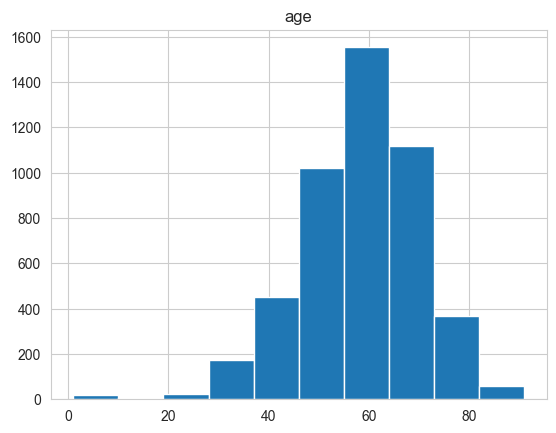

In [16]:
df_train.hist()

sex
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

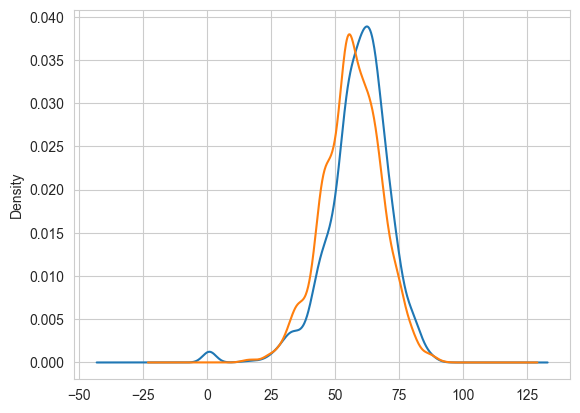

In [17]:
df_train.groupby('sex').age.plot(kind='kde')

sex
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

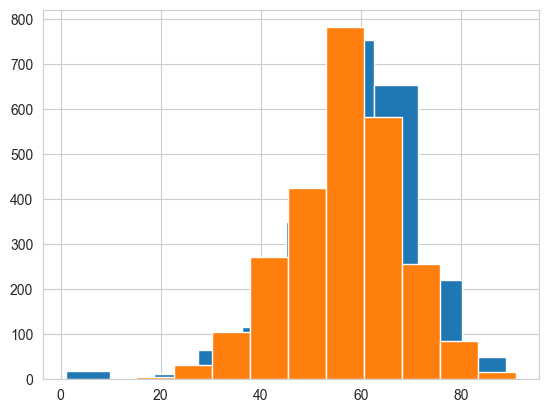

In [18]:
df_train.groupby('sex').age.hist()

labels
['A']    Axes(0.125,0.11;0.775x0.77)
['C']    Axes(0.125,0.11;0.775x0.77)
['D']    Axes(0.125,0.11;0.775x0.77)
['G']    Axes(0.125,0.11;0.775x0.77)
['H']    Axes(0.125,0.11;0.775x0.77)
['M']    Axes(0.125,0.11;0.775x0.77)
['N']    Axes(0.125,0.11;0.775x0.77)
['O']    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

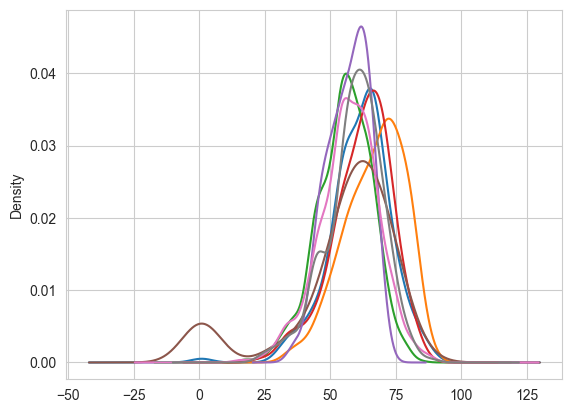

In [19]:
df_train.groupby('labels').age.plot(kind='kde')

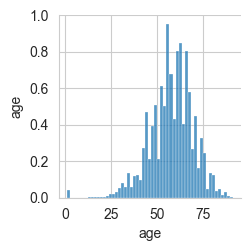

In [22]:
sns.pairplot(df_train)

<Axes: xlabel='labels', ylabel='age'>

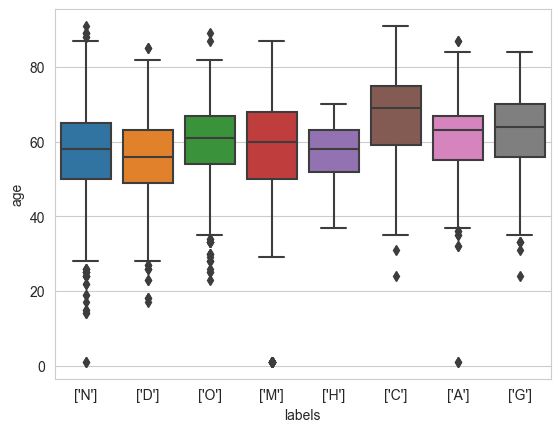

In [35]:
sns.boxplot(data=df, x='labels', y='age')

<Axes: xlabel='sex', ylabel='count'>

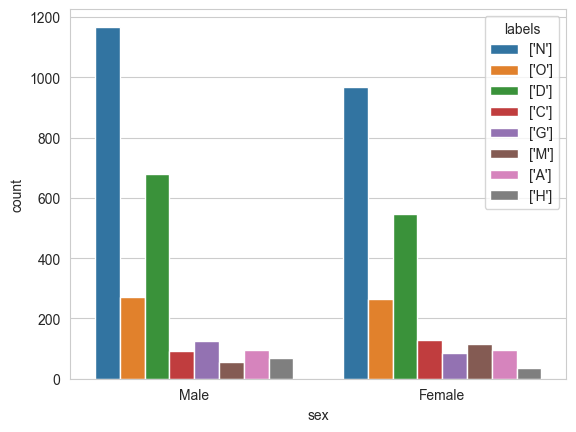

In [23]:
sns.countplot(data = df_train, x = 'sex', hue = 'labels')

<Axes: xlabel='labels', ylabel='count'>

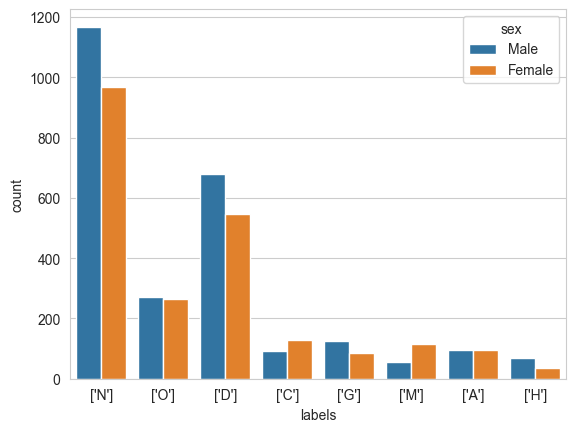

In [43]:
sns.countplot(data = df_train, x ='labels', hue = 'sex')

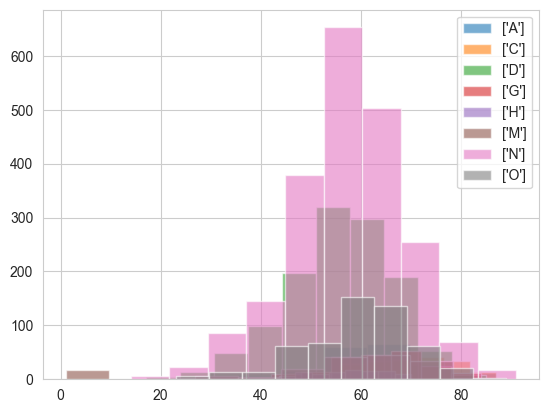

In [24]:
df_train.groupby('labels')['age'].hist(alpha=0.6, legend=True);

In [25]:
df_no_N = df_train[df_train['labels']!="['N']"]
df_no_N

,age,sex,labels
3848,55,Female,['O']
5838,63,Male,['D']
2586,52,Male,['D']
824,75,Male,['C']
4358,76,Female,['G']
...,...,...,...
4185,61,Female,['O']
2985,56,Male,['D']
3331,61,Male,['A']
517,61,Male,['D']


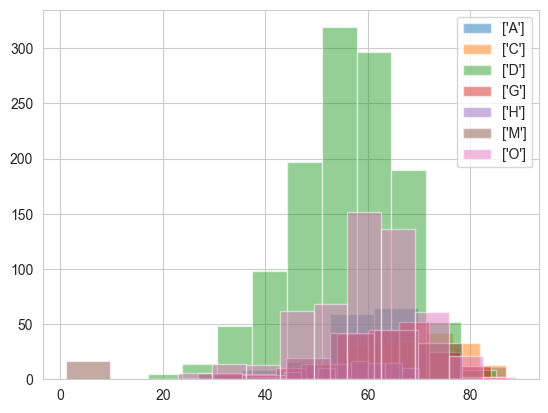

In [26]:
df_no_N.groupby('labels')['age'].hist(alpha=0.5, legend=True);

In [27]:
df_no_NandD = df_no_N[df_no_N['labels']!="['D']"]


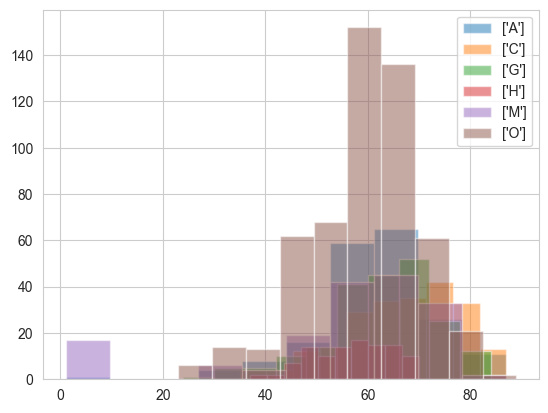

In [28]:
df_no_NandD.groupby('labels')['age'].hist(alpha=0.5, legend=True);

In [29]:
df_train.groupby(['age','sex', 'labels'])

In [30]:
df_train.groupby('labels')['age'].agg(['mean'])

,mean
labels,
['A'],61.373684
['C'],67.013636
['D'],55.625407
['G'],62.090476
['H'],56.839623
['M'],54.755952
['N'],57.226954
['O'],59.261682


In [31]:
df_train.groupby('sex')['age'].agg(['mean'])

,mean
sex,
Female,59.079571
Male,56.633946


In [32]:
df.groupby(['labels', 'sex'])['age'].agg(['mean'])

mean
labels sex              
['A']  Female  60.624000
       Male    61.730496
['C']  Female  67.273810
       Male    66.080000
['D']  Female  56.716763
       Male    54.931223
['G']  Female  65.355932
       Male    61.361446
['H']  Female  60.872340
       Male    54.827160
['M']  Female  52.388535
       Male    60.120000
['N']  Female  58.553257
       Male    56.040179
['O']  Female  61.379213
       Male    57.815341

In [33]:
df.groupby(['labels', 'sex'])['age'].agg(['max'])

max
labels sex        
['A']  Female   84
       Male     87
['C']  Female   87
       Male     91
['D']  Female   80
       Male     85
['G']  Female   84
       Male     84
['H']  Female   70
       Male     68
['M']  Female   79
       Male     87
['N']  Female   89
       Male     91
['O']  Female   82
       Male     89

In [34]:
df.groupby(['labels', 'sex'])['age'].agg(['min'])

min
labels sex        
['A']  Female    1
       Male     32
['C']  Female   36
       Male     24
['D']  Female   18
       Male     17
['G']  Female   31
       Male     24
['H']  Female   45
       Male     37
['M']  Female    1
       Male     29
['N']  Female    1
       Male     15
['O']  Female   26
       Male     23

# Feature Engineering

In [39]:
numerical_columns = ['age']
categorical_columns = ['sex']

In [42]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [65]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='error', drop='if_binary'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [66]:
column_transformer.fit(X_train)
X_train_fe = column_transformer.transform(X_train)
X_test_fe = column_transformer.transform(X_test)

## Random Forest

In [67]:
rfc = RandomForestClassifier(n_estimators=120)   
#rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_fe, y_train)

RandomForestClassifier(n_estimators=120)

In [68]:
rfc.score(X_train_fe,y_train)

0.45869837296620775

In [69]:
rfc.score(X_test_fe,y_test)

0.4499374217772215

## Ensembled Model

In [70]:
models = [
          ('logreg', LogisticRegression(max_iter=1000)),
          ('forest', RandomForestClassifier(class_weight='balanced')),
          ('svm', SVC(kernel='rbf'))
]
em = VotingClassifier(models)

em.fit(X_train_fe, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(max_iter=1000)),
                             ('forest',
                              RandomForestClassifier(class_weight='balanced')),
                             ('svm', SVC())])

In [71]:
em.score(X_train_fe,y_train)

0.44910304547350854

In [72]:
em.score(X_test_fe,y_test)

0.4643304130162703